In [2]:
import pandas as pd
import matplotlib.pyplot as mp
import seaborn as sn
import string as s
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize,word_tokenize
from wordcloud import WordCloud
import plotly.express as px
import plotly.graph_objects as go
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB,ComplementNB
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,AdaBoostClassifier
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score
import joblib as j
import numpy as np
import warnings as w
w.filterwarnings('ignore')



In [3]:
df=pd.read_csv('email_classification.csv')

In [4]:
# import nltk

# # Fix for stopwords and tokenization
# nltk.download('stopwords')
# nltk.download('punkt')

In [5]:
df.sample(3)

,email,label
17,Your Facebook account has been hacked. Click h...,spam
10,Don't miss out on our special offer! Sign up n...,ham
8,Your account has been credited with loyalty po...,ham


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   179 non-null    object
 1   label   179 non-null    object
dtypes: object(2)
memory usage: 2.9+ KB


In [7]:
df['label'].value_counts()

label
ham     100
spam     79
Name: count, dtype: int64

In [8]:
len(df['email'][0])

81

In [9]:
def count_characters(x):
    return len(x)
df['total_characters']=df['email'].apply(count_characters)

In [10]:
df.head(3)

,email,label,total_characters
0,Upgrade to our premium plan for exclusive acce...,ham,81
1,Happy holidays from our team! Wishing you joy ...,ham,73
2,We're hiring! Check out our career opportuniti...,ham,75


In [11]:
df['email'][1]

'Happy holidays from our team! Wishing you joy and prosperity this season.'

In [12]:
def count_words(x):
    return len(x.split(" "))
df['total_words']=df['email'].apply(count_words)

In [13]:
df.sample(3)

,email,label,total_characters,total_words
4,Your opinion matters! Take our survey and help...,ham,74,12
134,Thank you for your loyalty. Here's a special d...,ham,82,14
51,You've been selected for a free trial of our p...,spam,89,16


In [14]:
df['email']=df['email'].str.lower()

In [15]:

df['count_offer']=df['email'].apply(lambda x: 1 if "offer" in x else 0)
      

In [16]:
df['count_offer'].value_counts()

count_offer
0    166
1     13
Name: count, dtype: int64

In [17]:
df.loc[df['count_offer']==1,['email','label']]

,email,label
10,don't miss out on our special offer! sign up n...,ham
21,get ready for our flash sale! limited-time off...,ham
28,thank you for your recent purchase. here's a s...,ham
63,don't miss out on our limited-time offer. shop...,ham
75,act fast! limited-time offer on designer handb...,spam
78,act now! limited-time offer on luxury watches....,spam
94,thank you for subscribing to our newsletter. h...,ham
137,we're celebrating our anniversary! join us for...,ham
159,act fast! limited-time offer on designer handb...,spam
165,act fast! limited-time offer on luxury watches...,spam


In [18]:
df['count_act']=df['email'].apply(lambda x: 1 if x.startswith("act")  else 0)

In [19]:
df['count_act'].value_counts()

count_act
0    175
1      4
Name: count, dtype: int64

In [20]:
df.loc[df['count_act']==1 ,['email','label']]

,email,label
75,act fast! limited-time offer on designer handb...,spam
78,act now! limited-time offer on luxury watches....,spam
159,act fast! limited-time offer on designer handb...,spam
165,act fast! limited-time offer on luxury watches...,spam


In [21]:
df['email'][117]

"we're here to help! contact our customer support team for assistance."

In [22]:
df['get_limited_time']=df['email'].apply(lambda x:1 if "limited-time" in x else 0 )

In [23]:
df['get_limited_time'].value_counts()

get_limited_time
0    172
1      7
Name: count, dtype: int64

In [24]:
df.sample(5)

,email,label,total_characters,total_words,count_offer,count_act,get_limited_time
114,get exclusive access to our vip club. click he...,spam,61,12,0,0,0
164,unlock exclusive discounts! click here to join...,spam,67,10,0,0,0
97,your account has been hacked. click here to re...,spam,64,11,0,0,0
104,congratulations! you've been selected for a fr...,spam,107,17,0,0,0
101,your paypal account has been locked. click her...,spam,79,13,0,0,0


In [25]:
df['count_click']=df['email'].apply(lambda x: 1 if "click" in x else 0)

In [26]:
df['count_click'].value_counts()

count_click
0    104
1     75
Name: count, dtype: int64

In [27]:
df.loc[df['count_click']==1,['email','label']]

,email,label
3,your amazon account has been locked. click her...,spam
6,your email account storage is full. click here...,spam
9,you've been chosen for a free iphone. click he...,spam
12,you're pre-approved for a loan. click here to ...,spam
16,you're a winner! click here to claim your excl...,spam
...,...,...
164,unlock exclusive discounts! click here to join...,spam
165,act fast! limited-time offer on luxury watches...,spam
168,your credit card has been charged for unauthor...,spam
171,you've been chosen for a free iphone. click he...,spam


In [28]:
df['count_won']=df['email'].apply(lambda x : 1 if "won"  in x or "win" in x else 0)

In [29]:
df['count_won'].value_counts()

count_won
0    157
1     22
Name: count, dtype: int64

In [30]:
df.loc[df['count_won']==1,['email','label']]

,email,label
16,you're a winner! click here to claim your excl...,spam
24,you've won a luxury car! click here to claim y...,spam
32,congratulations! you've won a free vacation to...,spam
48,congratulations! you've won a free trip to eur...,spam
54,you've won a luxury car! click here to claim y...,spam
56,your opinion matters! take our survey and get ...,ham
67,congratulations! you're our lucky winner of th...,spam
76,claim your prize now! click here to confirm yo...,spam
79,congratulations! you're the lucky winner of ou...,spam
89,you've won a luxury cruise! click here to clai...,spam


In [31]:
df['count_lottery']=df['email'].apply(lambda x: 1 if "lottery" in x else 0)

In [32]:
df['count_lottery'].value_counts()

count_lottery
0    178
1      1
Name: count, dtype: int64

In [33]:
df['count_congratulation']=df['email'].apply(lambda x : 1 if "congratulations" in x else 0)

In [34]:
df['count_congratulation'].value_counts()

count_congratulation
0    163
1     16
Name: count, dtype: int64

In [35]:
df.loc[df['count_congratulation']==1,['email','label']]

,email,label
18,congratulations on reaching a new milestone! h...,ham
19,congratulations! you've been selected for a jo...,spam
32,congratulations! you've won a free vacation to...,spam
48,congratulations! you've won a free trip to eur...,spam
67,congratulations! you're our lucky winner of th...,spam
79,congratulations! you're the lucky winner of ou...,spam
100,congratulations! you're the winner of our dail...,spam
104,congratulations! you've been selected for a fr...,spam
105,congratulations! you've been selected for a fr...,spam
110,congratulations! you're the winner of our dail...,spam


In [36]:
df['count_claim']=df['email'].apply(lambda x: 1 if "claim" in x else 0)

In [37]:
df['count_claim'].value_counts()

count_claim
0    153
1     26
Name: count, dtype: int64

In [38]:
df.loc[df['count_claim']==1,['email','label']]

,email,label
9,you've been chosen for a free iphone. click he...,spam
16,you're a winner! click here to claim your excl...,spam
24,you've won a luxury car! click here to claim y...,spam
32,congratulations! you've won a free vacation to...,spam
47,you've been selected for a free iphone x. clic...,spam
48,congratulations! you've won a free trip to eur...,spam
50,you've been selected for a special prize. clic...,spam
54,you've won a luxury car! click here to claim y...,spam
65,you've been selected for a free iphone x. clic...,spam
67,congratulations! you're our lucky winner of th...,spam


In [39]:
df['count_lucky']=df['email'].apply(lambda x : 1 if "lucky" in x else 0)

In [40]:
df['count_lucky'].value_counts()

count_lucky
0    175
1      4
Name: count, dtype: int64

In [41]:
df['count_acc']=df['email'].apply(lambda x: 1 if 'account' in x else 0)

In [42]:
df['count_chosen']=df['email'].apply(lambda x : 1 if "chosen" in x else 0)

In [43]:
df['count_chosen'].value_counts()

count_chosen
0    177
1      2
Name: count, dtype: int64

In [44]:
st = set(stopwords.words('english'))



def c_stopword(x):
    wr = []
    for word in x.split():
        if word.lower() in st:  
            wr.append(word)
    return len(wr)
df['count_stopwords']=df['email'].apply(c_stopword)



In [45]:
df['email'][2]

"we're hiring! check out our career opportunities and join our dynamic team."

In [46]:
df['count_sent']=df['email'].apply(lambda x: len(sent_tokenize(x)))


In [47]:
df.head(4)

,email,label,total_characters,total_words,count_offer,count_act,get_limited_time,count_click,count_won,count_lottery,count_congratulation,count_claim,count_lucky,count_acc,count_chosen,count_stopwords,count_sent
0,upgrade to our premium plan for exclusive acce...,ham,81,13,0,0,0,0,0,0,0,0,0,0,0,5,1
1,happy holidays from our team! wishing you joy ...,ham,73,12,0,0,0,0,0,0,0,0,0,0,0,5,2
2,we're hiring! check out our career opportuniti...,ham,75,12,0,0,0,0,0,0,0,0,0,0,0,5,2
3,your amazon account has been locked. click her...,spam,83,13,0,0,0,1,0,0,0,0,0,1,0,6,2


In [48]:
ps=PorterStemmer()
df['stem_sentence']=df['email'].apply(lambda x: ' '.join(ps.stem(i) for i in word_tokenize(x)))    


In [49]:
df.head(3)

,email,label,total_characters,total_words,count_offer,count_act,get_limited_time,count_click,count_won,count_lottery,count_congratulation,count_claim,count_lucky,count_acc,count_chosen,count_stopwords,count_sent,stem_sentence
0,upgrade to our premium plan for exclusive acce...,ham,81,13,0,0,0,0,0,0,0,0,0,0,0,5,1,upgrad to our premium plan for exclus access t...
1,happy holidays from our team! wishing you joy ...,ham,73,12,0,0,0,0,0,0,0,0,0,0,0,5,2,happi holiday from our team ! wish you joy and...
2,we're hiring! check out our career opportuniti...,ham,75,12,0,0,0,0,0,0,0,0,0,0,0,5,2,we 're hire ! check out our career opportun an...


In [50]:
df['email'][0]

'upgrade to our premium plan for exclusive access to premium content and features.'

In [51]:
def remove_punctuation(text):
    translator = str.maketrans('', '', s.punctuation)
    return text.translate(translator)
df['stem_sentence']=df['stem_sentence'].apply(remove_punctuation)

In [52]:
def remove_stwrd(x):
    l=[]
    for i in x.split():
        if i.lower() not in  st:
            l.append(i)
    return " ".join(l)        


In [53]:
df['stem_sentence']=df['stem_sentence'].apply(remove_stwrd)

In [54]:
df['stem_sentence'][0]

'upgrad premium plan exclus access premium content featur'

In [55]:
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='black')

In [56]:
spam_wc=wc.generate(df[df['label']=='spam']['stem_sentence'].str.cat(sep=" "))

In [57]:

fig=px.imshow(spam_wc)
fig.update_layout(paper_bgcolor="black",width=500,font=dict(color="yellow"))

In [58]:
not_spam_wc=wc.generate(df[df['label']=='ham']['stem_sentence'].str.cat(sep=' '))

In [59]:

fig=px.imshow(spam_wc)
fig.update_layout(paper_bgcolor="black",width=500,font=dict(color="yellow"))

In [60]:
spam_corpus=[]
for msg in df[df['label']=='spam']['stem_sentence'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

len(spam_corpus)        

546

In [61]:
spam_mostcmn=Counter(spam_corpus).most_common(20)
spam_datafr=pd.DataFrame(spam_mostcmn,columns=['word','occurence'])
spam_mostcmn

[('click', 75),
 ('account', 33),
 ('claim', 26),
 ('ha', 24),
 ('prize', 17),
 ('free', 14),
 ('congratul', 11),
 ('select', 11),
 ('get', 9),
 ('activ', 8),
 ('winner', 7),
 ('trial', 7),
 ('premium', 7),
 ('exclus', 6),
 ('access', 6),
 ('luxuri', 6),
 ('servic', 6),
 ('join', 6),
 ('quick', 5),
 ('credit', 5)]

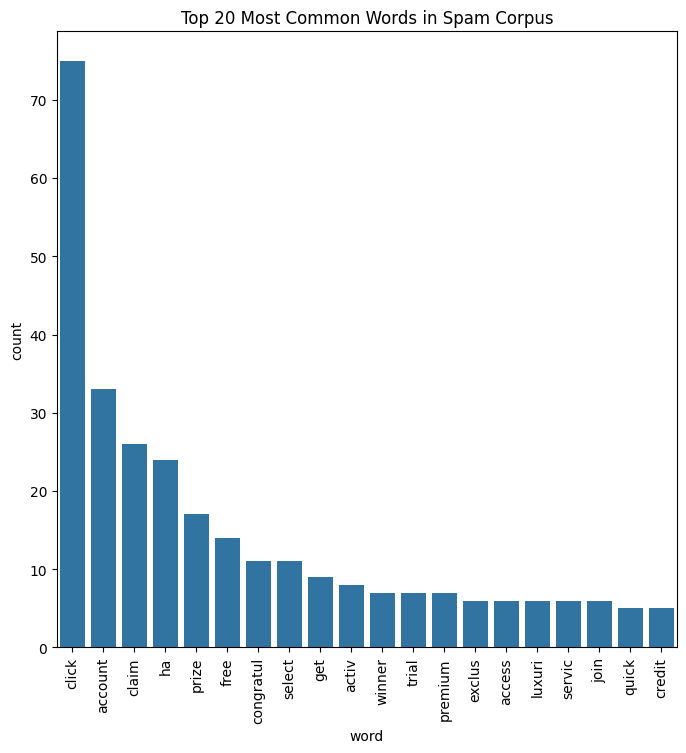

In [62]:
mp.figure(figsize=(8, 8))
sn.barplot(x='word', y='occurence', data=spam_datafr)
mp.title('Top 20 Most Common Words in Spam Corpus')
mp.xlabel('word')
mp.xticks(rotation=90)
mp.ylabel('count')
mp.show()

In [63]:
ham_word=[]
for words in df[df['label']=='ham']['stem_sentence'].tolist():
    for i in words.split(' '):
        ham_word.append(i)

len(ham_word)        


740

In [64]:
ham_word_count=Counter(ham_word).most_common(20)
ham_data=pd.DataFrame(ham_word_count,columns=['word','count'])

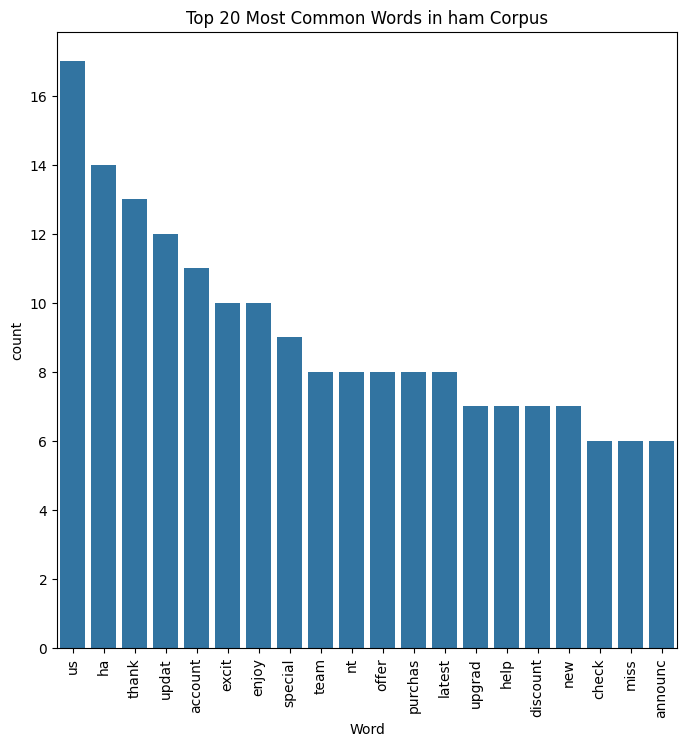

In [65]:
mp.figure(figsize=(8, 8))
sn.barplot(x='word', y='count', data=ham_data)
mp.title('Top 20 Most Common Words in ham Corpus')
mp.xlabel('Word')
mp.xticks(rotation=90)
mp.ylabel('count')
mp.show()

In [66]:
labelE=LabelEncoder()
df['label']=labelE.fit_transform(df['label'])

In [67]:
df.head(3)

,email,label,total_characters,total_words,count_offer,count_act,get_limited_time,count_click,count_won,count_lottery,count_congratulation,count_claim,count_lucky,count_acc,count_chosen,count_stopwords,count_sent,stem_sentence
0,upgrade to our premium plan for exclusive acce...,0,81,13,0,0,0,0,0,0,0,0,0,0,0,5,1,upgrad premium plan exclus access premium cont...
1,happy holidays from our team! wishing you joy ...,0,73,12,0,0,0,0,0,0,0,0,0,0,0,5,2,happi holiday team wish joy prosper thi season
2,we're hiring! check out our career opportuniti...,0,75,12,0,0,0,0,0,0,0,0,0,0,0,5,2,hire check career opportun join dynam team


In [69]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])
df_corr = numeric_df.corr()

# Plot the correlation matrix
fig = px.imshow(df_corr, text_auto=True, aspect="auto", title='Feature Correlation Matrix')
fig.update_layout(plot_bgcolor="Black", paper_bgcolor="Black", font=dict(color="Yellow"), title_font=dict(color="RED"))
fig.show()

In [70]:
vectorizer=CountVectorizer()
x_bow=vectorizer.fit_transform(df['stem_sentence']).toarray()

In [71]:
print("BoW feature names:", vectorizer.get_feature_names_out())
print("BoW features:\n", x_bow)

BoW feature names: ['50' 'access' 'account' 'achiev' 'act' 'activ' 'ad' 'advanc' 'affili'
 'alway' 'amazon' 'ani' 'anniversari' 'announc' 'annual' 'anoth'
 'antiviru' 'anyth' 'anytim' 'app' 'appeal' 'appli' 'appreci' 'asap'
 'assist' 'attach' 'attend' 'await' 'back' 'balanc' 'ban' 'bank' 'base'
 'befor' 'benefit' 'better' 'big' 'blog' 'bonu' 'brows' 'busi' 'buy'
 'call' 'car' 'card' 'career' 'cash' 'celebr' 'chanc' 'chang' 'channel'
 'charg' 'chat' 'check' 'chosen' 'claim' 'click' 'club' 'code' 'collabor'
 'collect' 'commit' 'compani' 'compromis' 'comput' 'concern' 'confirm'
 'congratul' 'connect' 'contact' 'content' 'continu' 'credit' 'cruis'
 'current' 'custom' 'daili' 'day' 'dear' 'deliv' 'deliveri' 'demand'
 'design' 'detail' 'detect' 'differ' 'difficulti' 'discount' 'disput'
 'download' 'due' 'dynam' 'earli' 'earn' 'ecofriendli' 'email' 'end'
 'endofseason' 'enhanc' 'enjoy' 'europ' 'event' 'everi' 'excel' 'excit'
 'exclus' 'experi' 'experienc' 'expir' 'extend' 'facebook' 'fast' 'f

In [72]:
pca = PCA(n_components=15) 
X_bow_pca = pca.fit_transform(x_bow)

print("PCA reduced features:\n", X_bow_pca)

PCA reduced features:
 [[-0.32563326 -0.1033399   1.29371566 ... -0.32215686 -0.31215595
  -0.40541235]
 [-0.45159986 -0.27905575 -0.07326397 ... -0.07479536 -0.51934931
  -0.39743431]
 [-0.50284753 -0.31774072 -0.03366367 ... -0.26260217 -0.41245836
  -0.13963178]
 ...
 [-0.32996033  0.00734067  1.4642937  ... -0.12609756  0.55610538
  -0.33059734]
 [-0.49669078 -0.36441509 -0.04227589 ...  0.22110573 -0.38011489
  -0.03661244]
 [-0.66125658 -0.37689019 -0.2395447  ...  0.24500803 -0.01407432
  -0.35152673]]


In [73]:
df.columns

Index(['email', 'label', 'total_characters', 'total_words', 'count_offer',
       'count_act', 'get_limited_time', 'count_click', 'count_won',
       'count_lottery', 'count_congratulation', 'count_claim', 'count_lucky',
       'count_acc', 'count_chosen', 'count_stopwords', 'count_sent',
       'stem_sentence'],
      dtype='object')

In [74]:
df.drop('email',axis=1,inplace=True)

In [75]:
X_numerical = df[['total_characters', 'total_words', 'count_offer', 'count_act', 'get_limited_time',
                  'count_click', 'count_won', 'count_lottery', 'count_congratulation', 'count_claim',
                  'count_lucky', 'count_acc', 'count_chosen', 'count_stopwords', 'count_sent']].values

In [76]:
y=df['label'].values
y

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1])

In [77]:
mx=MinMaxScaler()
x_bow_mx=mx.fit_transform(X_numerical)

In [78]:
X_combined = np.hstack((x_bow_mx, X_bow_pca))
X_combined

array([[ 0.52727273,  0.4       ,  0.        , ..., -0.32215686,
        -0.31215595, -0.40541235],
       [ 0.38181818,  0.3       ,  0.        , ..., -0.07479536,
        -0.51934931, -0.39743431],
       [ 0.41818182,  0.3       ,  0.        , ..., -0.26260217,
        -0.41245836, -0.13963178],
       ...,
       [ 0.6       ,  0.5       ,  0.        , ..., -0.12609756,
         0.55610538, -0.33059734],
       [ 0.29090909,  0.3       ,  0.        , ...,  0.22110573,
        -0.38011489, -0.03661244],
       [ 0.43636364,  0.4       ,  1.        , ...,  0.24500803,
        -0.01407432, -0.35152673]])

In [79]:
x_train,x_test,y_train,y_test=train_test_split(X_combined,y,random_state=42,test_size=0.2)

In [80]:
classifiers = [
    MultinomialNB(),
    GaussianNB(),
    BernoulliNB(),
    ComplementNB(),
    RandomForestClassifier(),
    ExtraTreesClassifier(),
    AdaBoostClassifier(),
    xgb.XGBClassifier(),
    DecisionTreeClassifier()
]

In [81]:
params = {
  
    'GaussianNB': {},
    'BernoulliNB': {},
    'RandomForestClassifier': {'n_estimators': [50, 100, 200]},
    'ExtraTreesClassifier': {'n_estimators': [50, 100, 200]},
    'AdaBoostClassifier': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1.0]},
    'XGBClassifier': {'max_depth': [3, 6, 9], 'learning_rate': [0.01, 0.1, 0.2]},
    'DecisionTreeClassifier': {'max_depth': [None, 10, 20]}
}

In [82]:
results = {'Classifier': [], 'Best Parameters': [], 'Best CV Accuracy': [], 'Test Set Accuracy': [], 'Test Set Precision': []}

# Grid search for best model
for clf in classifiers:
    clf_name = clf.__class__.__name__
    if clf_name in params:
        param_grid = params[clf_name]
        grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
        grid_search.fit(x_train, y_train)
        
        results['Classifier'].append(clf_name)
        results['Best Parameters'].append(grid_search.best_params_)
        results['Best CV Accuracy'].append(grid_search.best_score_)
        
        y_pred = grid_search.predict(x_test)
        test_accuracy = accuracy_score(y_test, y_pred)
        results['Test Set Accuracy'].append(test_accuracy)
        test_precision = precision_score(y_test, y_pred, average='weighted')
        results['Test Set Precision'].append(test_precision)



In [83]:
best_model = ExtraTreesClassifier(n_estimators=100)
best_model.fit(x_train, y_train)
j.dump(vectorizer, "vectorizer.pkl")
j.dump(pca, "pca.pkl")
j.dump(mx, "scaler.pkl")
j.dump(best_model, "model.pkl")

['model.pkl']